In [10]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [11]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [12]:
NUM_CLASSES = 27

# 学習データ読み込み

In [13]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [14]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [17]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 27)                  │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,367 (5.34 KB)

 Trainable params: 1,367 (5.34 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [19]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [20]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0391 - loss: 3.4885
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0385 - loss: 3.4100 - val_accuracy: 0.0540 - val_loss: 3.3239
Epoch 2/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0234 - loss: 3.3317
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0334 - loss: 3.3435 - val_accuracy: 0.0583 - val_loss: 3.2966
Epoch 3/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0312 - loss: 3.3034
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0339 - loss: 3.3169 - val_accuracy: 0.1015 - val_loss: 3.2751
Epoch 4/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0391 - loss: 3.3387
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [21]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8265 - loss: 0.7752 


In [22]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [23]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[1.2238213e-13 3.9475843e-05 2.7014996e-08 5.7921186e-03 8.1227314e-10
 2.0889519e-07 3.3350272e-05 6.2121642e-01 1.8758430e-01 8.9470805e-06
 1.6534212e-01 9.6449193e-17 4.4545513e-03 2.4348434e-17 8.7395327e-11
 3.3621076e-05 1.3937235e-02 1.2230015e-03 2.7508586e-20 1.5968720e-15
 8.1934607e-12 1.1493330e-22 2.2026031e-17 7.0233219e-15 3.3385438e-04
 7.9040854e-07 3.2568001e-10]
7


# 混同行列

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


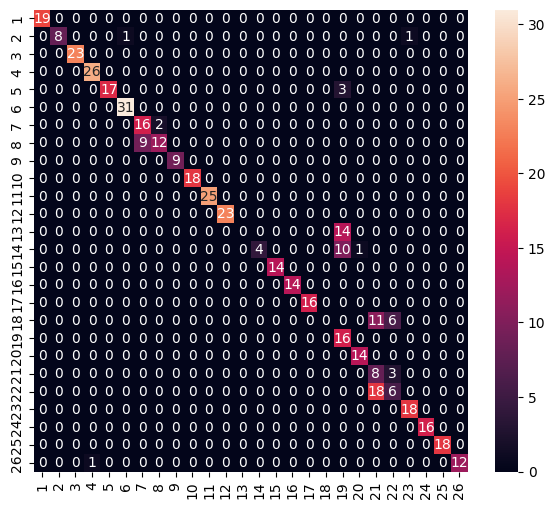

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00        23
           4       0.96      1.00      0.98        26
           5       1.00      0.85      0.92        20
           6       0.97      1.00      0.98        31
           7       0.64      0.89      0.74        18
           8       0.86      0.57      0.69        21
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        23
          13       0.00      0.00      0.00        14
          14       1.00      0.27      0.42        15
          15       1.00      1.00      1.00        14
          16       1.00      1.00      1.00        14
          17       1.00      1.00      1.00        16
     

C:\Users\subuc\Downloads\hand-gesture-recognition-mediapipe-main\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subuc\Downloads\hand-gesture-recognition-mediapipe-main\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\subuc\Downloads\hand-gesture-recognition-mediapipe-main\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [25]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [ ]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\subuc\AppData\Local\Temp\tmp_adaxs32\assets


INFO:tensorflow:Assets written to: C:\Users\subuc\AppData\Local\Temp\tmp_adaxs32\assets


# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))